In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

In [2]:
FILENAME = './data/data.csv'

In [3]:
df = pd.read_csv(FILENAME)
df.head(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [4]:
df.tail(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
13898,2012-08-07,3,1,8,7,0,2,1,2,0.70,0.6667,0.74,0.1343,502
13899,2012-08-07,3,1,8,8,0,2,1,2,0.70,0.6515,0.70,0.1642,705
13900,2012-08-07,3,1,8,9,0,2,1,2,0.70,0.6667,0.74,0.1343,327
13901,2012-08-07,3,1,8,10,0,2,1,2,0.74,0.6970,0.70,0.1343,250
13902,2012-08-07,3,1,8,11,0,2,1,2,0.76,0.7273,0.66,0.0896,214


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13903 entries, 0 to 13902
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      13903 non-null  object 
 1   season      13903 non-null  int64  
 2   yr          13903 non-null  int64  
 3   mnth        13903 non-null  int64  
 4   hr          13903 non-null  int64  
 5   holiday     13903 non-null  int64  
 6   weekday     13903 non-null  int64  
 7   workingday  13903 non-null  int64  
 8   weathersit  13903 non-null  int64  
 9   temp        13903 non-null  float64
 10  atemp       13903 non-null  float64
 11  hum         13903 non-null  float64
 12  windspeed   13903 non-null  float64
 13  cnt         13903 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 1.5+ MB


**Notes:**
- No presence of nulls
- All numerical data except dteday
- dteday should be converted into date type

In [6]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000
mean,2.263828,0.378192,5.650147,11.546573,0.027404,2.999425,0.684457,1.419981,0.499170,0.478017,0.622996,0.194097,174.639143
std,1.036254,0.484953,3.218423,6.912235,0.163264,2.005710,0.464749,0.644060,0.197716,0.176614,0.198194,0.123023,166.955414
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,37.000000
50%,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.620000,0.194000,130.000000
75%,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.790000,0.283600,258.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,957.000000


**Notes:**
- High std for the target variable
- Features such as temp, atemp and windspeed have been normalized
- The rest of variables correspond to time features which should be treated as categories

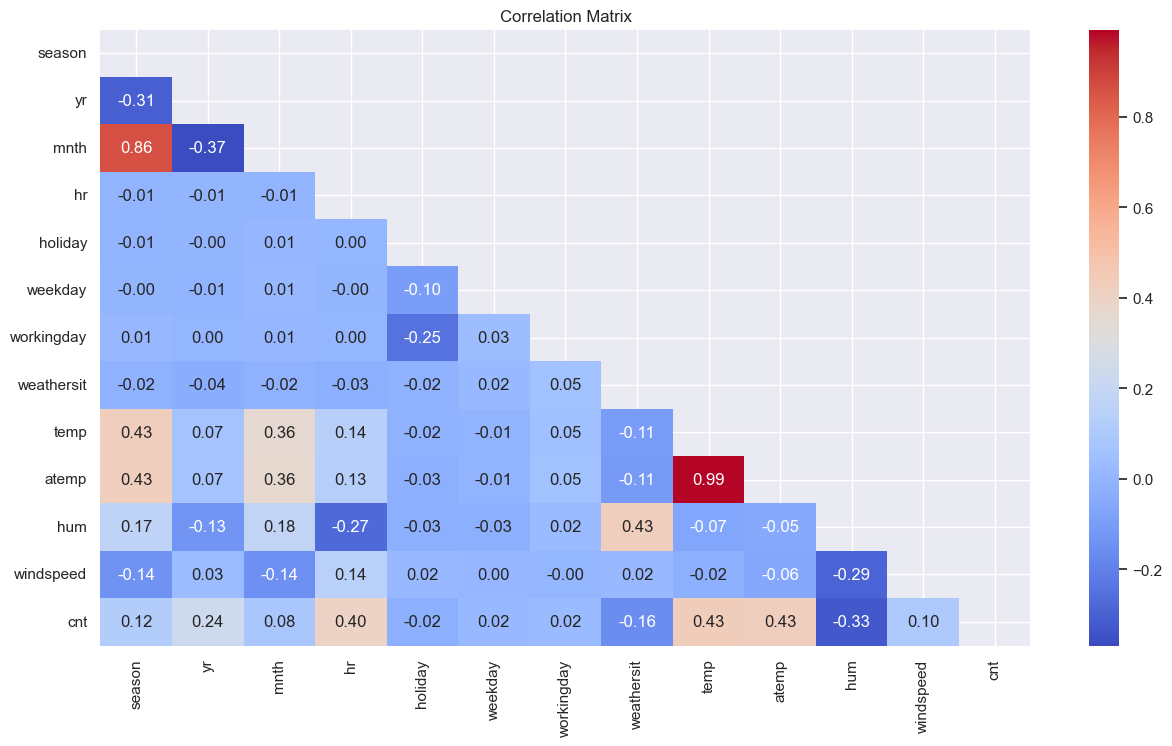

In [7]:
corr_cols = df.drop(columns=["dteday"]).columns
cor_mtx = df[corr_cols].corr()
mask = np.triu(np.ones_like(cor_mtx, dtype=bool))

fig = plt.figure(figsize=(15, 8))
sns.heatmap(cor_mtx, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig("./figs/corr_matrix.png")
plt.show()

**Notes:**
- Atemp relates to the feeling temperature, hence this strong correlation between these two.
- Month and season also notorious correlation
- hr and temp seems to be the variables that affect the most to bike demand. 

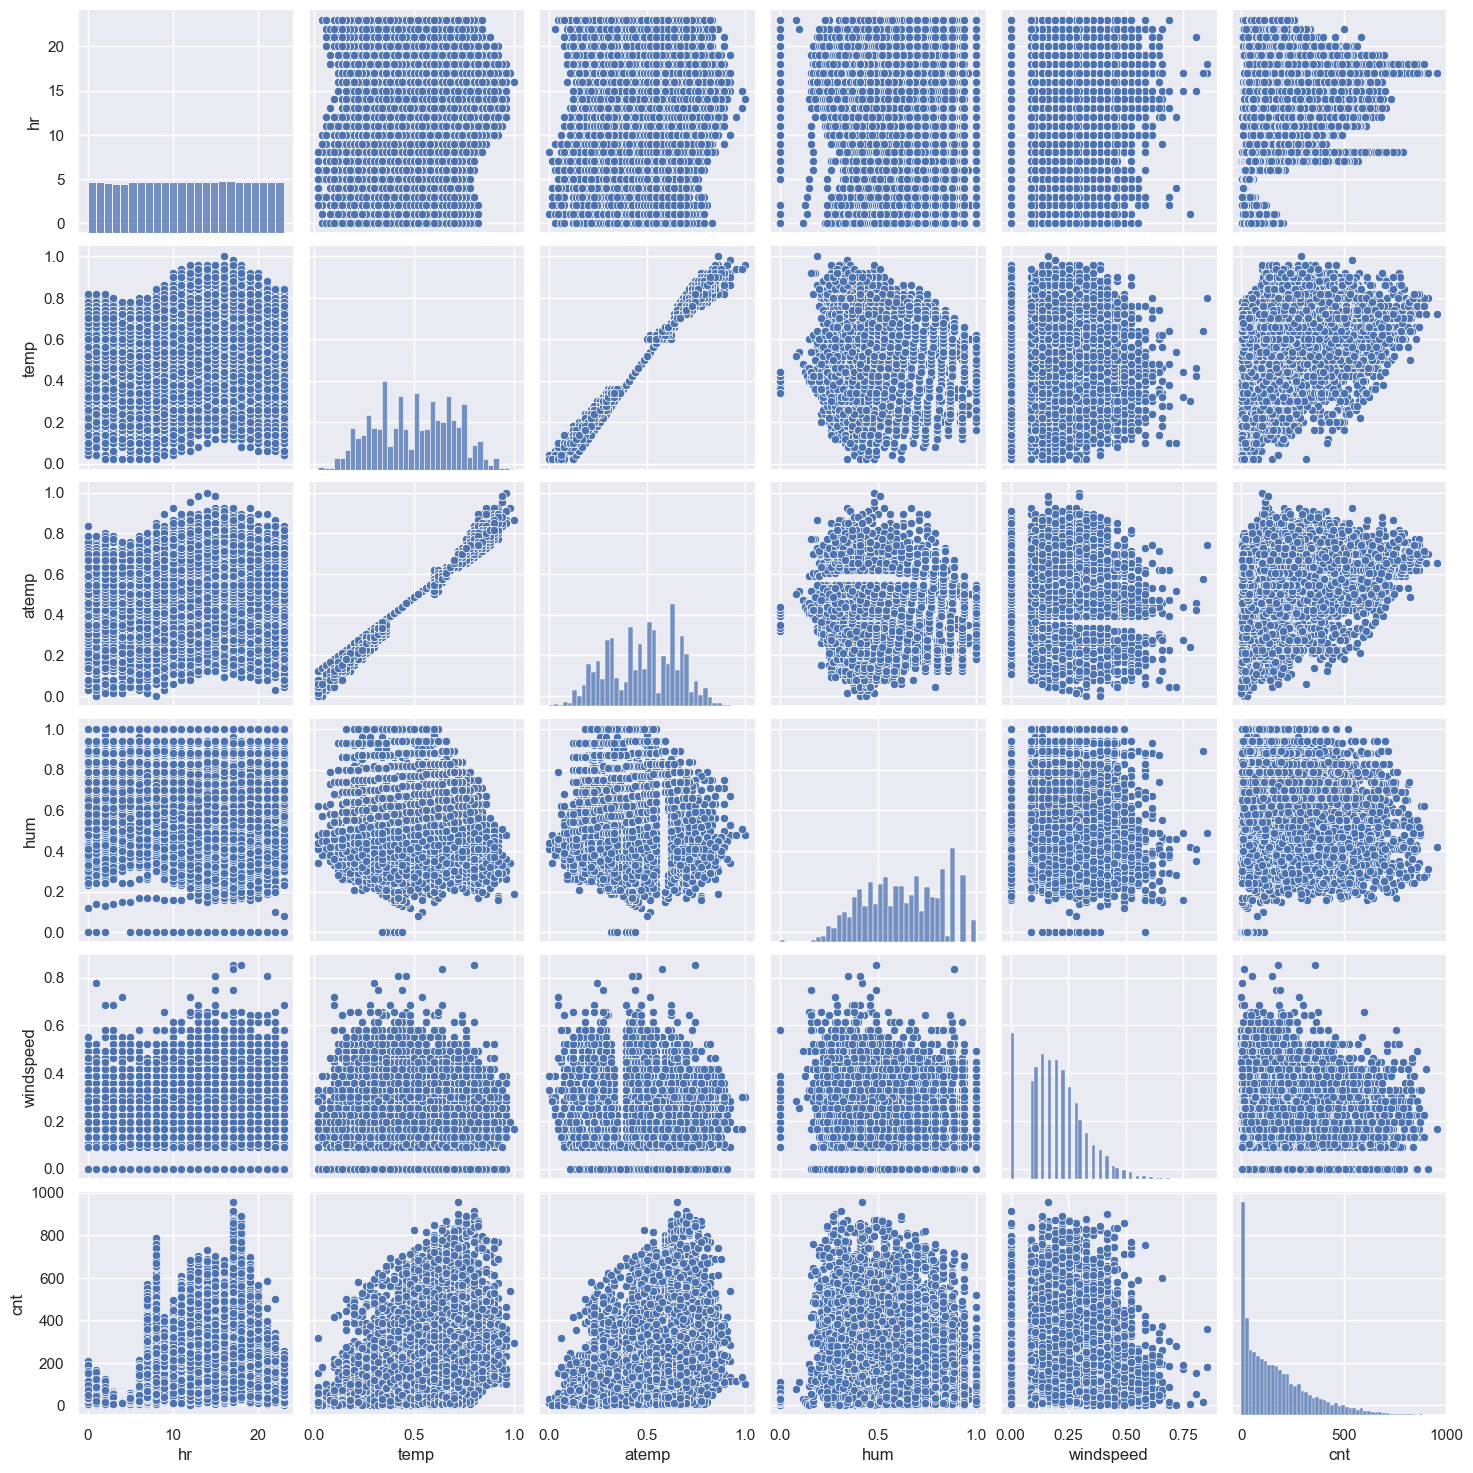

In [8]:
numerical_vars = ["hr", "temp", "atemp", "hum", "windspeed", "cnt"]
sns.pairplot(df[numerical_vars])
plt.savefig("./figs/pairplot.png")
plt.show()

**Notes:**
- Temp, atemp and hum seem to follow a normal distribution.
- cnt, and windspeed show skewed distribution. 
- Almost perfect correlation between atemp and temp.
- As observable in the scatterplot when the temp and atemp increase, on average, the demand also increases. 

### Timeseries Analysis

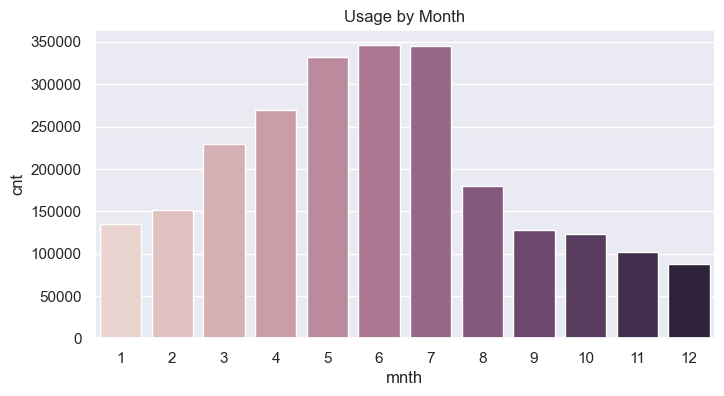

In [21]:
mnth_grp_cnt = df.groupby(by=["mnth"])["cnt"].sum().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data = mnth_grp_cnt, x = "mnth", y= "cnt", hue="mnth", legend=False)
plt.title("Usage by Month")
plt.savefig("./figs/usage_by_month.png")
plt.show()

**Notes:**
- Bike demand shows an increasing pattern from march to july approximately.

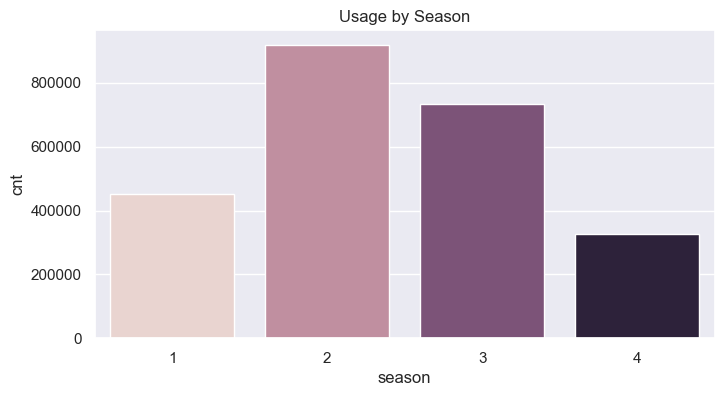

In [22]:
season_grouped_df = df.groupby(by="season")["cnt"].sum().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data = season_grouped_df, x = "season", y= "cnt", hue="season", legend=False)
plt.title("Usage by Season")
plt.savefig("./figs/usage_by_season.png")
plt.show()

**Notes:**
- Spring and summer are the seasons with more demand
- There seems to be some degree of seasonality in the demand for bikes.

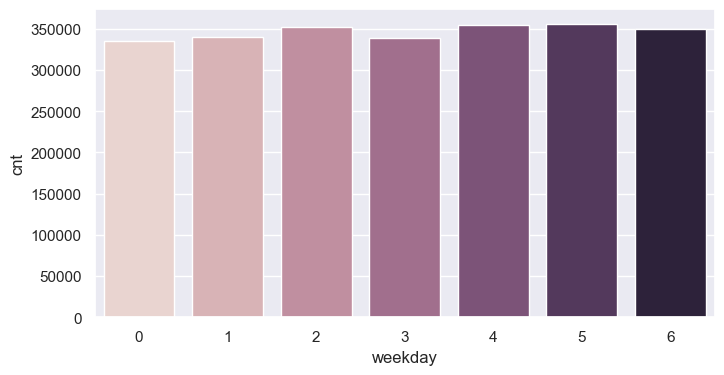

In [23]:
weekday_grpd_df = df.groupby(by="weekday")["cnt"].sum().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data = weekday_grpd_df, x = "weekday", y= "cnt", hue="weekday", legend=False)
plt.savefig("./figs/usage_by_weelday.png")
plt.show()

**Notes:**
- The data does not show any relevant pattern for weekdays.

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

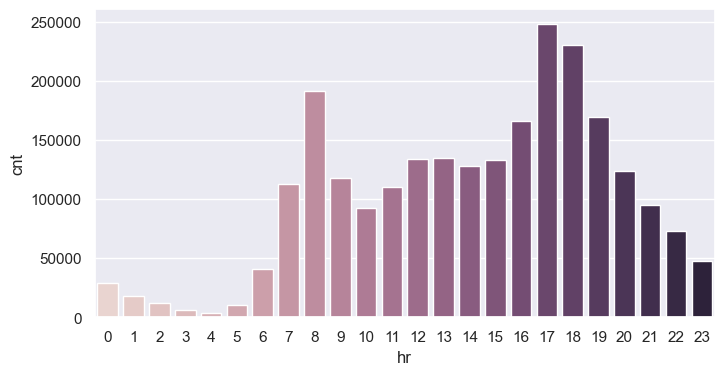

In [26]:
hr_grpd_df = df.groupby(by="hr")["cnt"].sum().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data = hr_grpd_df, x = "hr", y= "cnt", hue="hr", legend=False)
plt.savefig("./figs/usage_by_hour.png")
plt.show()


**Notes:**
- Demand seems to be higher during rush hours. People may use the service for commuting to work or school and later for going home or other places.

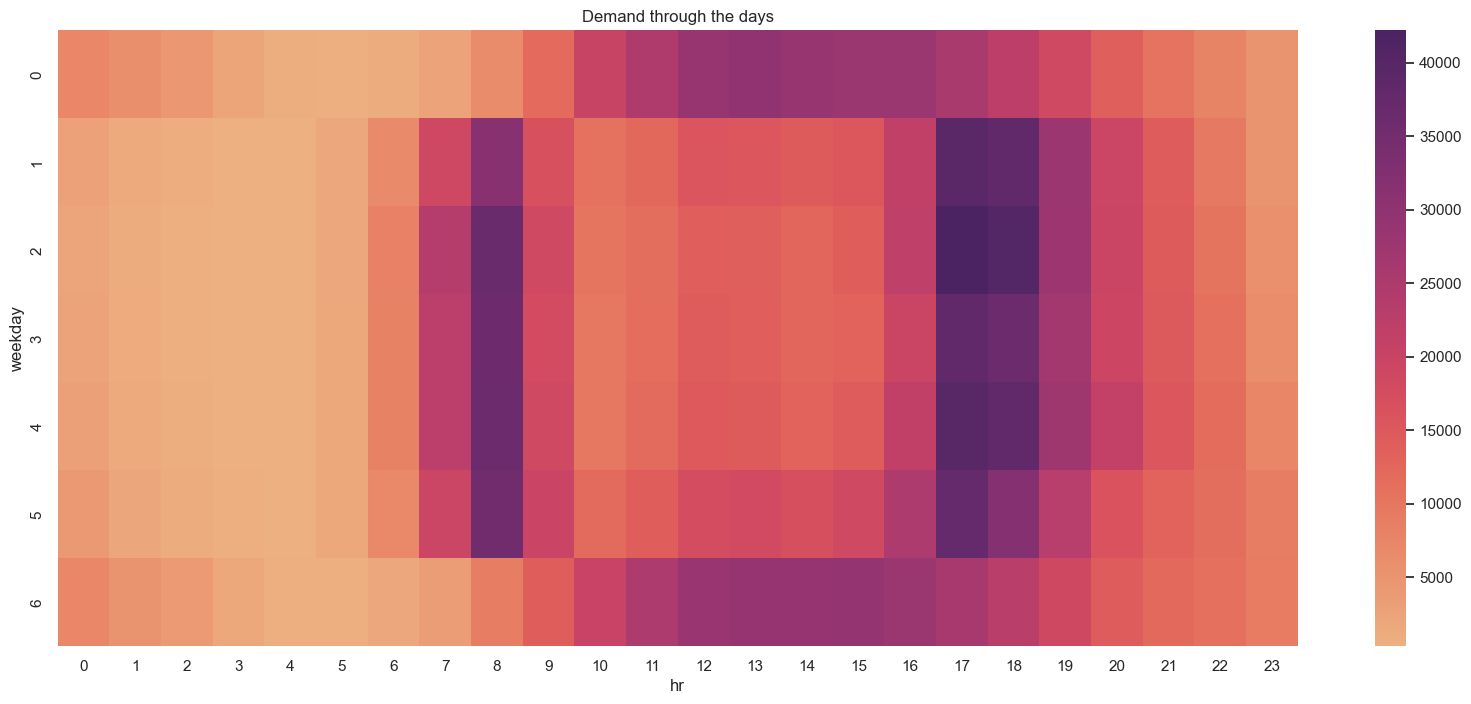

In [27]:
# How demand distributes during the day
unstacked_df = df.groupby(by = ["hr", "weekday"])["cnt"].sum().unstack(level=0)
fig = plt.figure(figsize=(20, 8))
sns.heatmap(unstacked_df, cmap='flare')
plt.title("Demand through the days")
plt.savefig("./figs/usage_across_day.png")
plt.show()

**Notes:**
- During week days, the demand increases during rush hours, specially when peaople commute to work/school and when they commute back home or any other place.
- On the other hand, during weekends, the demand increases during noon, where people may use it for leisure.


<Figure size 800x400 with 0 Axes>

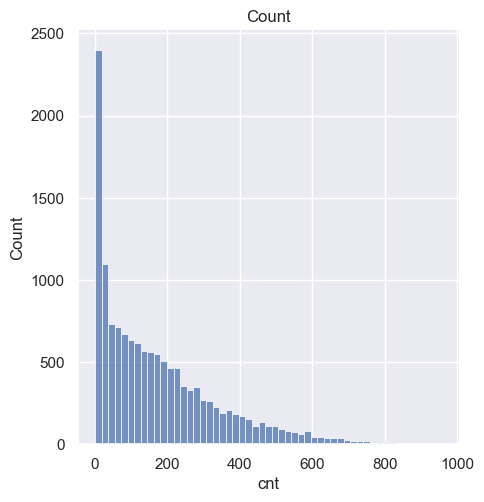

In [33]:
plt.figure(figsize=(8,4))
sns.displot(df['cnt'])
plt.title('Count')
plt.savefig("./figs/cnt_distribution.png")
plt.show()

**Notes:**
- Target variable shows a right skewed distribution. 
- This distribution indicates lots of low demands with some eventful spikes.
- Applying a log transformation to the target variable should improve the results on ML algorithms such as Linear Regression, or Random Forests. 


<Figure size 800x400 with 0 Axes>

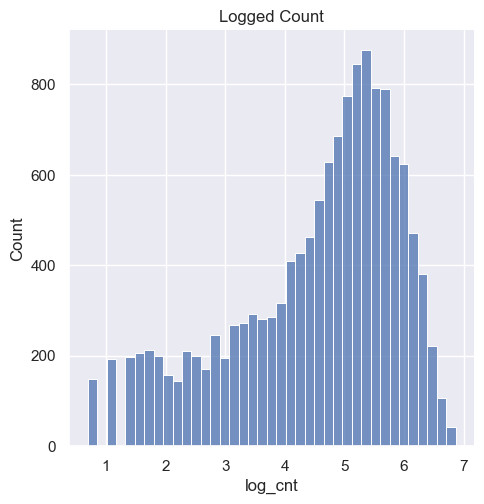

In [34]:
# Log cnt
df["log_cnt"] = np.log1p(df["cnt"])
plt.figure(figsize=(8,4))
sns.displot(df['log_cnt'])
plt.title('Logged Count')
plt.savefig("./figs/logged_cnt_distribution.png")
plt.show()

**Notes:**
- Now the target variable looks more suitable for applying ML algos.applying

# Preprocessing
As seen during the exploratory data analysis, there are a few transformations that should be made in order get the data ready for applying ML algos. In this case, the data needs to: 
- OneHot encoding for categorical variables 
- Remove atemp since it was strongly correlated with temp variable.